In [25]:
%load_ext autoreload
%autoreload 2
%load_ext sql 

import xlwt
import pandas as pd
import bio.hts.apredica as apr
from bio.hts.htsdb import *

HCI_DIR = '/share/server_data/project/HCI/HepRn-1/'
DAT_DIR = HCI_DIR+'data/'
INC_DIR = DAT_DIR+'incoming/'

mng.register_connection("hts-db","htsdb",username="ishah",
                        password="ishah",host='localhost')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [27]:
HtsPlate.objects.count()

416

In [12]:
!ls $DAT_DIR

apr-heprn-sep-2013.csv	incoming


In [13]:
# FIles created in Apredica Oct 2013
R_HepRn = pd.read_csv(DAT_DIR+'apr-heprn-sep-2013.csv')


In [14]:
R_HepRn.head()

,sample_id,sample_rep_id,chemical_id,chemical_casrn,chemical_name,assay_name,assay_plate_id,row_index,col_index,time,conc,value,source_file,sample_tech_rep_id,ctrl,cell,feature,lconc,phase
0,Bupivacaine,Bupivacaine,NaN,NaN,NaN,CLM_Hepat_Apoptosis_1hr,02S01T01P000501,4,23,1,800.0,76.42,cellumen_conc_response_v2_10Dec2009.txt,Bupivacaine_02S01T01P000501_rep_1,0,HepRn,Apoptosis,2.90309,1
1,Bupivacaine,Bupivacaine,NaN,NaN,NaN,CLM_Hepat_Apoptosis_1hr,02S01T01P000501,5,23,1,400.0,57.72,cellumen_conc_response_v2_10Dec2009.txt,Bupivacaine_02S01T01P000501_rep_1,0,HepRn,Apoptosis,2.60206,1
2,Bupivacaine,Bupivacaine,NaN,NaN,NaN,CLM_Hepat_Apoptosis_1hr,02S01T01P000501,6,23,1,200.0,53.52,cellumen_conc_response_v2_10Dec2009.txt,Bupivacaine_02S01T01P000501_rep_1,0,HepRn,Apoptosis,2.30103,1
3,Bupivacaine,Bupivacaine,NaN,NaN,NaN,CLM_Hepat_Apoptosis_1hr,02S01T01P000501,7,23,1,100.0,59.90,cellumen_conc_response_v2_10Dec2009.txt,Bupivacaine_02S01T01P000501_rep_1,0,HepRn,Apoptosis,2.00000,1
4,Bupivacaine,Bupivacaine,NaN,NaN,NaN,CLM_Hepat_Apoptosis_1hr,02S01T01P000501,8,23,1,50.0,60.83,cellumen_conc_response_v2_10Dec2009.txt,Bupivacaine_02S01T01P000501_rep_1,0,HepRn,Apoptosis,1.69897,1


In [17]:
print 'HepRn',R_HepRn.phase.unique()
print 'Times',R_HepRn.time.unique()
print 'Assays',R_HepRn.feature.unique()

HepRn [1]
Times [ 1 24 48]
Assays ['Apoptosis' 'CellLoss' 'DNADamage' 'DNATexture' 'LysosomalMass' 'MitoFxnI'
 'NuclearSize' 'Steatosis']


In [18]:
#A=True
#if A:
#    HtsChem.drop_collection()
#    HtsExp.drop_collection()
#    HtsAssay.drop_collection()
#    HtsWell.drop_collection()
#    HtsPlate.drop_collection()
#    HtsConcRespCurveNrm.drop_collection()
#    HtsAssayResult.drop_collection()
#    HtsAnalysisMethod.drop_collection()
#    HtsAnalysisStep.drop_collection()
    

In [11]:
Exp=apr.createAprExperiment(name='Apredica High Content Imaging in Rat primary hepatocytes (Phase I)',
                            org ='rat',cell='HepRn',tags=['HCS','PhI'],
                            eid='APR-HepRn-PhI')
apr.storeAprExperiment(R_HepRn,Exp,dbg=True)

I. Storing 120 plates
> Plate: 02S01T01P000501 (   0/ 120)
> Plate: 02S01T01P000507 (   1/ 120)
> Plate: 02S01T01P000513 (   2/ 120)
> Plate: 02S01T01P000519 (   3/ 120)
> Plate: 02S1T01P000407 (   4/ 120)
> Plate: 02S1T01P000413 (   5/ 120)
> Plate: 02S1T01P000419 (   6/ 120)
> Plate: 02S1T01P000425 (   7/ 120)
> Plate: 02S1T01P000431 (   8/ 120)
> Plate: 02S1T01P000437 (   9/ 120)
> Plate: 02S1T01P000477 (  10/ 120)
> Plate: 02S1T01P000495 (  11/ 120)
> Plate: 02S1T01P000559 (  12/ 120)
> Plate: 02S1T01P000565 (  13/ 120)
> Plate: 02S1T01P000571 (  14/ 120)
> Plate: 02S1T01P000755 (  15/ 120)
> Plate: 02S1T01P000761 (  16/ 120)
> Plate: 02S1T01P000767 (  17/ 120)
> Plate: 02S1T01P000773 (  18/ 120)
> Plate: 02S1T01P000779 (  19/ 120)
> Plate: 02S1T24P000409 (  20/ 120)
> Plate: 02S1T24P000415 (  21/ 120)
> Plate: 02S1T24P000421 (  22/ 120)
> Plate: 02S1T24P000427 (  23/ 120)
> Plate: 02S1T24P000433 (  24/ 120)
> Plate: 02S1T24P000439 (  25/ 120)
> Plate: 02S1T24P000479 (  26/ 120)
> 

In [13]:
# update chemicals
HtsChem.objects.update(set__ctrl=0)
CTRL = pd.read_csv(DAT_DIR+'apr-ctrl.csv')
for x in CTRL.to_records():
    print x['chemical_name']
    HtsChem.objects(name__iexact=x['chemical_name']).update(set__ctrl=x['ctrl'])

for HC in HtsChem.objects(chid__exists=0):
    C = Chemical.objects(Q(casrn=HC.casrn) | Q(name__iexact=HC.name)).first()
    if C:
        print 'found',HC.name
        HC.chid=C.id
        HC.save()
    else:
        print 'not found',HC.name

Anisomycin
Camptothecin
DMSO
Etoposide
CCCP
Demeclocyclin
Taxol
0
Bupivacaine
Chloroquine
Tunicamycin
Cyclosporin A


In [14]:
# update treatment duration of 
for P1 in HtsPlate.objects:
    TH = set([i.timeh for i in P1.wells])
    if len(TH)>1: 
        print 'Multiple times:',P1.eid
    P1.timeh=TH.pop()
    P1.save()

In [287]:
CHID = [i.id for i in Chemical.objects(tags='tx-pharma')]
HtsChem.objects(ctrl=0,chid__in=CHID).count()
CASRN=map(str,Chemical.objects(tags='tx-pharma').distinct('casrn'))
HtsChem.objects(ctrl=0,casrn__in=CASRN).count()
#CASRN[:10]

111

In [29]:
# Create the analysis method
Steps = [HtsAnalysisStep(step=1,name='average-conc-reps',pkg='bio.hts.apredica',fun='analyzeHtsPlateConcResp',desc='Average assay response across replicate wells'),
         HtsAnalysisStep(step=2,name='-conc-response',pkg='bio.hts.apredica',fun='analyzeHtsPlateConcResp',desc='Smooth the assay response at each concentration using a moving window and weights (convolution)',
                         params=[HtsParam(name='window_len',value=7),HtsParam(name='smoother',value='np.hamming')]),
         HtsAnalysisStep(step=3,name='smooth-conc-response',pkg='bio.hts.apredica',fun='analyzeHtsPlateConcResp',desc='Smooth the assay response at each concentration using a moving window and weights (convolution)',
                         params=[HtsParam(name='window_len',value=7),HtsParam(name='smoother',value='np.hamming')]),
         HtsAnalysisStep(step=4,name='normalize-by-plate-median',pkg='bio.hts.apredica',fun='analyzeHtsPlateConcResp',desc='Normalize by median response of assay across non-control wells report as log2(FC)',
                         params=[HtsParam(name='normby',value='median')]),
         HtsAnalysisStep(step=5,name='calc-pct-resp',pkg='bio.hts.apredica',fun='analyzeHtsPlateConcResp',desc='Calculate the percentage change. Min=treated.quantile(0.02) and Max=posctrl.quantile(0.98)',
                         params=[HtsParam(name='pct_qb',desc='min_resp_quantile',value=0.02),HtsParam(name='pct_qt',desc='max_resp_quantile',value=0.98)]),
         HtsAnalysisStep(step=6,name='calc-zscore-resp',pkg='bio.hts.apredica',fun='analyzeHtsPlateConcResp',desc='Calculate the z-score using the median and std of assay response on plate')
         ]
S2 = []
for S in Steps: S2.append(S.save())
          
CR_meth=HtsAnalysisMethod(name='plate-window-smoothing-median-norm-pct',desc="Process Apredica plate: (a) Hamming smoother with window-length=7, (b) Median normalization, (c) Percentage change calculation ",
                          steps=S2)
CR_meth.save()

<HtsAnalysisMethod: HtsAnalysisMethod object>

In [30]:
CR_meth=HtsAnalysisMethod.objects(name='plate-window-smoothing-median-norm-pct').first()

In [24]:
# Generate Conc Resp Points
HtsConcRespCurveNrm.drop_collection()
CR_meth=HtsAnalysisMethod.objects(name='plate-window-smoothing-median-norm-pct').first()
N = HtsPlate.objects.count()
for i,pid in enumerate(HtsPlate.objects.distinct('eid')):
    print '%10s %3d/%d' %(pid,i,N)
    apr.storeHtsPlateConcResp(pid,meth=CR_meth,window_len=7,smoother=np.hanning,dbg=False)

01S01T24P0082   0/416
01S01T24P0086   1/416
01S01T24P0090   2/416
01S01T24P0094   3/416
01S01T24P0098   4/416
01S01T24P0102   5/416
01S01T24P0106   6/416
01S01T24P0220   7/416
01S01T24P0224   8/416
01S01T24P0228   9/416
01S01T24P0232  10/416
01S01T24P0236  11/416
01S01T24P0240  12/416
01S01T24P0252  13/416
01S01T24P0281  14/416
01S01T24P0285  15/416
01S01T24P0289  16/416
01S01T24P0301  17/416
01S01T24P0305  18/416
01S01T24P0313  19/416
01S01T48P0221  20/416
01S01T48P0225  21/416
01S01T48P0229  22/416
01S01T72P0084  23/416
01S01T72P0088  24/416
01S01T72P0092  25/416
01S01T72P0096  26/416
01S01T72P0100  27/416
01S01T72P0104  28/416
01S01T72P0108  29/416
01S01T72P0233  30/416
01S01T72P0237  31/416
01S01T72P0241  32/416
01S01T72P0253  33/416
01S01T72P0282  34/416
01S01T72P0286  35/416
01S01T72P0287  36/416
01S01T72P0290  37/416
01S01T72P0291  38/416
01S01T72P0302  39/416
01S01T72P0306  40/416
01S01T72P0314  41/416
01S02T24P0083  42/416
01S02T24P0087  43/416
01S02T24P0091  44/416
01S02T24P0

In [36]:
# Create the analysis method
# tol0=1e-4,lfc0=0.2,mit0=200,roots='fsolve',
Steps = [HtsAnalysisStep(step=1,name='interp-spline-conc-resp',pkg='bio.hts.apredica',fun='analyzeChemConcResp',
                         desc='Use a spline to interpolate response values: fold change (FC) and z-score (ZS)',
                         params=[HtsParam(name='spline_smooth',value=0)]),
         HtsAnalysisStep(step=2,name='calc-conc-prod-sig-effect',pkg='bio.hts.apredica',fun='analyzeChemConcResp',
                         desc='Calculate the LEC as the minimum concentration at which the z-score reaches Z0 and abs(log2(FC)) > lfc0.' + 
                              'Solve for the root(s) of the interpolated response i.e. ZS-Z0=0. In case of multiple roots pick lowest conc',
                         params=[HtsParam(name='Z0',value=1,desc='The z-score threshold for significance'),
                                 HtsParam(name='lfc0',value=0.2,desc='The log2(FC) threshold for significance (used in conjunction with Z0'),
                                 HtsParam(name='roots',value='fsolve',desc='Root finding function from scipy.optimize')]),
         HtsAnalysisStep(step=3,name='calc-potency',pkg='bio.hts.apredica',fun='analyzeChemConcResp',
                         desc='Calculate the maximum lfc (top)')
         ]
S2 = []
for S in Steps: S2.append(S.save())
          
CR_hit_meth=HtsAnalysisMethod(name='apr-calc-chem-assay-plate-lec-1',desc="Calculate the LEC from APR concentration response curves by deviation from background.",
                          steps=S2)
CR_hit_meth.save()

<HtsAnalysisMethod: HtsAnalysisMethod object>

In [2]:
CR_hit_meth=HtsAnalysisMethod.objects(name__iexact='apr-calc-chem-assay-plate-lec-1').first()
#CR_hit_meth.delete()
CR_hit_meth

<HtsAnalysisMethod: HtsAnalysisMethod object>

In [3]:
import bio.hts.apredica as apr
from bio.hts.htsdb import *

HtsAssayResult.drop_collection()
N = HtsConcRespCurveNrm.objects.count()
for k,Crc in enumerate(HtsConcRespCurveNrm.objects):
    if k and k % 300==0:
        print '%4d/%4d' % (k,N)
    #if HtsAssayResult.objects(crc=Crc): continue
    try:
        apr.storeChemConcResp(Crc,llec_max=6.0,lec_max=1e6,analysis_meth=CR_hit_meth,Z0=1,lfc0=0.2,dbg=False)
    except:
        print "Failed: ",Crc.assay.name,Crc.chem.name,Crc.plate.eid


 300/41656
 600/41656
 900/41656
1200/41656
1500/41656
1800/41656
2100/41656
2400/41656
2700/41656
3000/41656
3300/41656
3600/41656
3900/41656
4200/41656
4500/41656
4800/41656
5100/41656
5400/41656
5700/41656
6000/41656
6300/41656
6600/41656
6900/41656
7200/41656
7500/41656
7800/41656
8100/41656
8400/41656
8700/41656
9000/41656
9300/41656
9600/41656
9900/41656
10200/41656
10500/41656
10800/41656
11100/41656
11400/41656
11700/41656
12000/41656
12300/41656
12600/41656
12900/41656
13200/41656
13500/41656
13800/41656
14100/41656
14400/41656
14700/41656
15000/41656
15300/41656
15600/41656
15900/41656
16200/41656
16500/41656
16800/41656
17100/41656
17400/41656
17700/41656
18000/41656
18300/41656
18600/41656
18900/41656
19200/41656
19500/41656
19800/41656
20100/41656
20400/41656
20700/41656
21000/41656
21300/41656
21600/41656
21900/41656
22200/41656
22500/41656
22800/41656
23100/41656
23400/41656
23700/41656
24000/41656
24300/41656
24600/41656
24900/41656
25200/41656
25500/41656
25800/41656
2

In [222]:
Cas_cnt = dict( ((c,HtsChem.objects(casrn=c).count()) for c in HtsChem.objects.distinct('casrn') ))
REPS = [(HtsChem.objects(casrn=c).first().name,c,n,HtsChem.objects(casrn=c).distinct('eid')) for c,n in Cas_cnt.iteritems() if n>1]
[(HtsChem.objects(casrn=c).first().name,c,n) for c,n in Cas_cnt.iteritems() if n>1]

[(u'3-Iodo-2-propynylbutylcarbamate', u'55406-53-6', 3),
 (u'Prohexadione-calcium', u'127277-53-6', 2),
 (u'Diquat dibromide', u'85-00-7', 2),
 (u'Metsulfuron-methyl', u'74223-64-6', 2),
 (u'Oxasulfuron', u'144651-06-9', 2),
 (u'Chlorsulfuron', u'64902-72-3', 4),
 (u'Tribenuron-methyl', u'101200-48-0', 2),
 (u'Metiram-zinc', u'9006-42-2', 2),
 (u'Triflusulfuron-methyl', u'126535-15-7', 2),
 (u'Mesosulfuron-methyl', u'208465-21-8', 2),
 (u'Bensulide', u'741-58-2', 5),
 (u'Triasulfuron', u'82097-50-5', 2),
 (u'Primisulfuron-methyl', u'86209-51-0', 2),
 (u'Foramsulfuron', u'173159-57-4', 2),
 (u'EPTC', u'759-94-4', 3),
 (u'Bisphenol A', u'80-05-7', 2),
 (u'Halosulfuron-methyl', u'100784-20-1', 2),
 (u'Ethametsulfuron methyl', u'97780-06-8', 2),
 (u'Rimsulfuron', u'122931-48-0', 2),
 (u'ANIS', u'nan', 7),
 (u'Dibutyl phthalate', u'84-74-2', 3),
 (u'Prosulfuron', u'94125-34-5', 6),
 (u'Fenoxaprop-ethyl', u'66441-23-4', 3),
 (u'Diclofop-methyl', u'51338-27-3', 5),
 (u'Bensulfuron-methyl', u'

In [297]:
#PX = analyzeHtsPlateConcResp('071015TP37SP2-72',window_len=7,smoother=np.bartlett,dbg=True)
#set([len(i.resp) for i in HtsConcRespCurveNrm.objects])
    #print cr.lconc,cr.ppct,cr.slfc
#HtsConcRespCurveNrm.objects[20].plate.eid
#PX = analyzeHtsPlateConcResp(HtsConcRespCurveNrm.objects[20].plate.eid,window_len=7,smoother=np.bartlett,dbg=True)
E1 = HtsExp.objects[0]
CRC = HtsConcRespCurveNrm.objects(plate__in=HtsPlate.objects(exp=E1)).first()


[<HtsConcRespNrm: HtsConcRespNrm object>,
 <HtsConcRespNrm: HtsConcRespNrm object>,
 <HtsConcRespNrm: HtsConcRespNrm object>,
 <HtsConcRespNrm: HtsConcRespNrm object>,
 <HtsConcRespNrm: HtsConcRespNrm object>,
 <HtsConcRespNrm: HtsConcRespNrm object>,
 <HtsConcRespNrm: HtsConcRespNrm object>,
 <HtsConcRespNrm: HtsConcRespNrm object>,
 <HtsConcRespNrm: HtsConcRespNrm object>,
 <HtsConcRespNrm: HtsConcRespNrm object>]

In [340]:
#DZS1(LC1[:10])
nc

10

In [48]:
HtsAssayResult.objects(chem=HtsChem.objects(name__icontains='bisphenol').first()).count()
for AR in HtsAssayResult.objects(chem__in=HtsChem.objects(name__icontains='glitazone')):
    lec = next(i for i in AR.res if i.name=='lec')
    if lec.value>1e5: continue
    eff = next(i for i in AR.res if i.name=='efficacy')
    print AR.chem.name,AR.chem.eid,AR.crc.plate.exp.cell,AR.crc.plate.timeh,AR.assay.name,lec.value,lec.units,eff.value

Pioglitazone hydrochloride TX009773 HepG2 24.0 Apredica CellLoss 0.000190719648484 M -0.94340302749
Pioglitazone hydrochloride TX009773 HepG2 72.0 Apredica CellLoss 0.000130707165987 M -0.989978064268
Pioglitazone hydrochloride TX009773 HepG2 24.0 Apredica CellLoss 0.000197897748878 M -0.920740001791
Pioglitazone hydrochloride TX009773 HepG2 72.0 Apredica CellLoss 0.000122479812927 M -1.11320397729
Troglitazone TX006205 HepG2 72.0 Apredica OxidativeStress 0.000107308613472 M 1.36533914873
Troglitazone TX006205 HepG2 72.0 Apredica p53Act 0.000115138888034 M 1.82902730408
Troglitazone TX006205 HepG2 72.0 Apredica CellLoss 7.52424087812e-05 M -0.996423819228
Troglitazone TX006205 HepG2 24.0 Apredica MitoMembPot 0.000105420204787 M -1.549927212
Troglitazone TX006205 HepG2 72.0 Apredica CellLoss 6.4709021138e-05 M -1.03399549138
Troglitazone TX006205 HepG2 72.0 Apredica MitoticArrest 7.23633979862e-05 M 1.70929417548


In [28]:
#HtsConcRespCurveNrm.objects(assay__in=(HtsAssay.objects(name__icontains='CellLoss')),plate__in=(HtsPlate.objects(timeh=24))).count()
#set([i.chem.name for i in HtsAssayResult.objects((Q(res__name='llec') & Q(res__value__lt=-7)))])
#HtsAssayResult.objects(__raw__={'chem.name':{'$regex':'phthalate','$options':'i'}}).count()
HtsAssayResult.objects(__raw__={'res':{'$elemMatch':{'name':'llec','value':{'$lt':-7}}}},).count()


565

array([[Axes(0.125,0.672059;0.227941x0.227941),
        Axes(0.398529,0.672059;0.227941x0.227941),
        Axes(0.672059,0.672059;0.227941x0.227941)],
       [Axes(0.125,0.398529;0.227941x0.227941),
        Axes(0.398529,0.398529;0.227941x0.227941),
        Axes(0.672059,0.398529;0.227941x0.227941)],
       [Axes(0.125,0.125;0.227941x0.227941),
        Axes(0.398529,0.125;0.227941x0.227941),
        Axes(0.672059,0.125;0.227941x0.227941)]], dtype=object)

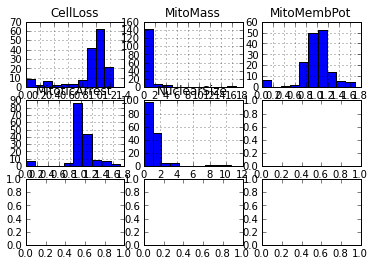

In [68]:
D1,T1,C1 = getPlateData('071015TP37SP2-72')
D1.ctrl.unique()
T1.groupby(level=1).median()
FC1 = T1/T1.quantile(q=0.5)
FC1.hist()

In [22]:
P1 = HtsPlate.objects(eid='01S2T24P0299').first()
W1 = P1.wells[100].chem
W1._data
HtsChem.objects(ctrl=None).count()

1031

In [18]:
# Create ToxCast APR assay 'parent' for the feature irrespective of direction / time.
import copy
for A in Assay.objects(tech__iexact='apr'):
    A1 = copy.deepcopy(A)
    A1.id=None
    A1.eid = re.sub('_\d+.*','',A1.eid)
    A1.name= re.sub('\s+\d+.*','',A1.name)
    if not Assay.objects(name=A1.name,eid=A1.eid):
        print ' Saving:',A1.eid,A1.name
        A1.save()

 Saving: APR_MitoMembPot APR MitoMembPot
 Saving: APR_NuclearSize APR NuclearSize
 Saving: APR_StressKinase APR StressKinase
 Saving: APR_MicrotubuleCSK APR MicrotubuleCSK
 Saving: APR_p53Act APR p53Act
 Saving: APR_OxidativeStress APR OxidativeStress


In [20]:
for A in Assay.objects(tech__iexact='apr'):
    print A.eid

APR_CellCycleArrest_24hr_dn
APR_MitoticArrest_72hr_up
APR_MitoticArrest_24hr_up
APR_MitoMass_24hr_dn
APR_CellLoss_1hr_up
APR_MitoticArrest_24hr_dn
APR_MitoMass_72hr_up
APR_MitoMass_24hr_up
APR_CellLoss_24hr_dn
APR_CellLoss_1hr_dn
APR_MitoMembPot_24hr_dn
APR_MitoMass_72hr_dn
APR_NuclearSize_24hr_dn
APR_CellLoss_24hr_up
APR_CellCycleArrest_72hr_up
APR_CellLoss_72hr_up
APR_CellCycleArrest_24hr_up
APR_MitoticArrest_1hr_dn
APR_CellCycleArrest_1hr_up
APR_MitoMembPot_1hr_dn
APR_NuclearSize_1hr_up
APR_CellCycleArrest_1hr_dn
APR_NuclearSize_24hr_up
APR_NuclearSize_72hr_up
APR_MitoMembPot_24hr_up
APR_MitoMembPot_1hr_up
APR_CellCycleArrest_72hr_dn
APR_CellLoss_72hr_dn
APR_MitoMembPot_72hr_up
APR_NuclearSize_1hr_dn
APR_MitoticArrest_1hr_up
APR_MitoMass_1hr_up
APR_NuclearSize_72hr_dn
APR_MitoticArrest_72hr_dn
APR_MitoMass_1hr_dn
APR_MitoMembPot_72hr_dn
APR_CellCycleArrest
APR_MitoticArrest
APR_MitoMass
APR_CellLoss
APR_MitoMembPot
APR_NuclearSize
APR_StressKinase
APR_MicrotubuleCSK
APR_p53Act
APR_O